First of all, we import pandas, matplotlib, pingouin, seaborn, and numpy packages, as well as the bitcoin dataset for this project.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import seaborn as sns

btc_csv = pd.read_csv('btc.csv')
btc_csv.tail()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
4344,2020-11-25,1127776,155,191010273,1.232324e+06,2.555478,3.478592e+11,1.361229e+11,1.759680e+13,0.000270,...,5.297341e+09,0.602011,11286.739745,0.007499,140.586705,586953.526742,1.100444e+10,0.025441,0.029995,0.024231
4345,2020-11-26,1115848,150,194489460,1.296596e+06,2.326869,3.175453e+11,1.364689e+11,1.759680e+13,0.000321,...,5.850255e+09,0.833083,14257.141167,0.008437,144.395104,725135.161273,1.240976e+10,0.026348,0.034779,0.027476
4346,2020-11-27,1099990,154,198138988,1.286617e+06,2.319540,3.173370e+11,1.368103e+11,1.759680e+13,0.000261,...,5.627533e+09,0.755055,12912.655336,0.007349,125.671728,661298.539447,1.130927e+10,0.026253,0.034150,0.027463
4347,2020-11-28,1038684,154,203808536,1.323432e+06,2.403131,3.292999e+11,1.370295e+11,1.759680e+13,0.000190,...,2.830387e+09,0.442011,7843.654180,0.005891,104.531984,339657.260458,6.027346e+09,0.025775,0.034535,0.027719
4348,2020-11-29,875712,150,166607431,1.110716e+06,2.458531,3.375839e+11,1.373112e+11,1.821054e+13,0.000153,...,3.228414e+09,0.613881,11167.030787,0.005662,102.996688,424789.200298,7.727284e+09,0.025241,0.034653,0.027733


We then load the second dataset for our project - the Federal Reserve's Balance Sheet in the name of fed_bs_csv.

In [36]:
fed_bs_csv = pd.read_csv(('WALCL.csv'), names= ['date', 'balance'], header=0)
fed_bs_csv.to_csv('btc_fed.csv')
fed_bs_csv

,date,balance
0,2002-12-18,719542.0
1,2002-12-25,732059.0
2,2003-01-01,730994.0
3,2003-01-08,723762.0
4,2003-01-15,720074.0
...,...,...
930,2020-10-14,7151426.0
931,2020-10-21,7177265.0
932,2020-10-28,7146306.0
933,2020-11-04,7157479.0


Since the balance sheet value in the dataset was named "WALCL", we changed it to "balance" to help readers understand easily. A new csv file 'btc_fed.csv' is created to integrate this change.

Next, we merge the two dataframes of bitcoin and Fed's balance sheet together on date. We filter the new dataframe to display only columns of date, balance, and PriceUSD.

In [37]:
btc_fed = fed_bs_csv.merge(btc_csv, on='date')
btc_fed= btc_fed[['date', 'balance', 'PriceUSD']]
btc_fed["price/balance"] = btc_fed['PriceUSD']/btc_fed['balance']
btc_fed

,date,balance,PriceUSD,price/balance
0,2009-01-07,2121439.0,NaN,NaN
1,2009-01-14,2049714.0,NaN,NaN
2,2009-01-21,2037112.0,NaN,NaN
3,2009-01-28,1927082.0,NaN,NaN
4,2009-02-04,1851437.0,NaN,NaN
...,...,...,...,...
614,2020-10-14,7151426.0,11417.108114,0.001596
615,2020-10-21,7177265.0,12848.490618,0.001790
616,2020-10-28,7146306.0,13290.328850,0.001860
617,2020-11-04,7157479.0,14129.148195,0.001974


A new column title "price/balance" is also generated by dividing values in the "PriceUSD" column by values in "balance" column of the dataframe.

Here is our first graph of the project. Using seaborn and matplotlib, we are able to plot a graph showing bitcoin's price against Fed's balance sheet from 2009 to 2020.

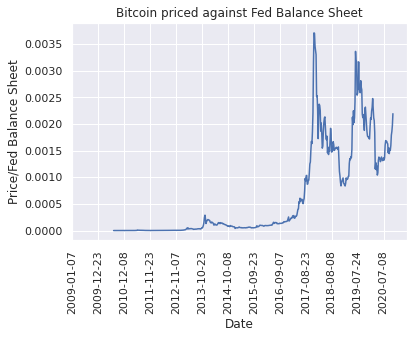

In [38]:
sns.set_theme(style="darkgrid")

#plt.plot(btc_fed["price/balance"])
plt.plot(btc_fed["date"], btc_fed["price/balance"])
plt.ylabel('Price/Fed Balance Sheet')
plt.xlabel('Date')
plt.title('Bitcoin priced against Fed Balance Sheet')
locs, texts = plt.xticks()
which_ones = list(range(0,618,50))
locs = [ locs[i] for i in which_ones ]
texts = btc_fed['date'][which_ones].to_list()
plt.xticks( locs, texts, rotation=90 )
plt.show()

To make necessary data cleaning and preparation for our second graph, we filter the original bitcoin dataset to take into account only values from 2017 and beyond. We also create three new variables for hash rate, price, and date of bitcoin after the year of 2017.

In [39]:
btc_csv_2017 = btc_csv[btc_csv['date'] > '2017-01-01']
hash_rate = np.log(btc_csv_2017['HashRate'])
price = btc_csv_2017['PriceUSD']
date = btc_csv_2017['date']
btc_csv_2017

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
2921,2017-01-02,695006,159,148469153,9.337683e+05,2.335242,1.635385e+10,7.003065e+09,3.176884e+11,0.000377,...,3.833167e+08,1.662787,1691.184235,0.011052,11.240857,1.188494e+06,1.208791e+09,0.020758,0.019554,0.017204
2922,2017-01-03,665048,164,150441533,9.173264e+05,2.357710,1.660569e+10,7.043146e+09,3.176884e+11,0.000395,...,4.470045e+08,2.130019,2199.476710,0.014858,15.342221,1.601629e+06,1.653857e+09,0.020298,0.019503,0.017118
2923,2017-01-04,695057,153,150872935,9.860976e+05,2.557701,1.824635e+10,7.133885e+09,3.176884e+11,0.000583,...,5.872737e+08,2.359280,2676.595053,0.020164,22.875589,1.695199e+06,1.923198e+09,0.021249,0.024148,0.020514
2924,2017-01-05,652932,140,137719466,9.837105e+05,2.237040,1.609297e+10,7.193868e+09,3.176884e+11,0.000402,...,6.649840e+08,3.600187,3601.980357,0.027246,27.259292,2.221913e+06,2.223020e+09,0.023254,0.035090,0.026785
2925,2017-01-06,718728,161,158543903,9.847447e+05,2.001650,1.435704e+10,7.172605e+09,3.176884e+11,0.000366,...,5.083565e+08,2.392291,2135.033863,0.021120,18.848937,1.758179e+06,1.569111e+09,0.024823,0.041711,0.030850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,2020-11-25,1127776,155,191010273,1.232324e+06,2.555478,3.478592e+11,1.361229e+11,1.759680e+13,0.000270,...,5.297341e+09,0.602011,11286.739745,0.007499,140.586705,5.869535e+05,1.100444e+10,0.025441,0.029995,0.024231
4345,2020-11-26,1115848,150,194489460,1.296596e+06,2.326869,3.175453e+11,1.364689e+11,1.759680e+13,0.000321,...,5.850255e+09,0.833083,14257.141167,0.008437,144.395104,7.251352e+05,1.240976e+10,0.026348,0.034779,0.027476
4346,2020-11-27,1099990,154,198138988,1.286617e+06,2.319540,3.173370e+11,1.368103e+11,1.759680e+13,0.000261,...,5.627533e+09,0.755055,12912.655336,0.007349,125.671728,6.612985e+05,1.130927e+10,0.026253,0.034150,0.027463
4347,2020-11-28,1038684,154,203808536,1.323432e+06,2.403131,3.292999e+11,1.370295e+11,1.759680e+13,0.000190,...,2.830387e+09,0.442011,7843.654180,0.005891,104.531984,3.396573e+05,6.027346e+09,0.025775,0.034535,0.027719


The dataframe of bitcoin from 2017 till today is named "btc_csv_2017".

Here is our second graph of the project - a Q-Q Plot displaying the normal distribution versus the number of block counts in the year of 2017, the year that marked a significant change in the world of bitcoin overall. The graph was plotted with the assisstance of pingouin module.

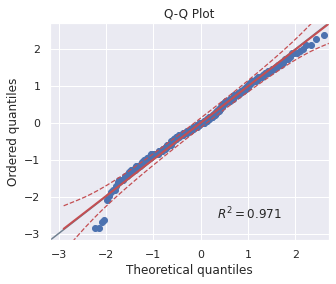

In [40]:
btc_year_2017 = btc_csv_2017[btc_csv_2017['date'] <= '2017-12-31']
block_count_2017 = btc_year_2017['BlkCnt']
ax3 = pg.qqplot(block_count_2017, dist='norm')

The block count for each day in 2017 seems normally distributed. In other words, the difficulty algorithm is doing a great job adjusting the difficultly to keep the number of blocks mined a day roughly the same. 

Another significant graph showing the development of bitcoin is hash rate versus price one. We plot both of them into one graph using the subplots() function of matplotlib.

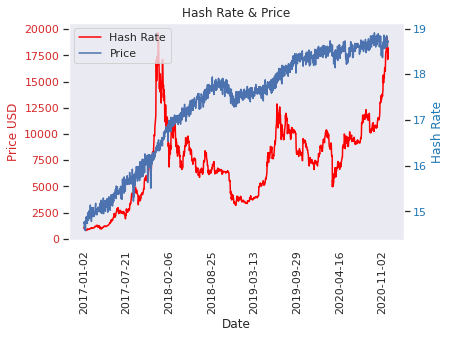

In [41]:
sns.set_theme(style="dark")

fig, ax1 = plt.subplots()

color = 'tab:red'


ax1.set_ylabel('Price USD', color=color)
plot1 = ax1.plot(date, price, label='Price', color='red')
ax1.tick_params(axis='y', labelcolor=color)
# ax1.legend()

locs, texts = plt.xticks()
which_ones = list(range(0,1428,200))
locs = [ locs[i] for i in which_ones ]
texts = date.iloc[which_ones].to_list()
plt.xticks( locs, texts, rotation=90 )
plt.xlabel("Date")

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis


color2 = 'tab:blue'

ax2.set_ylabel('Hash Rate', color=color2)
plot2 = ax2.plot(date, hash_rate, label = 'HashRate')
ax2.tick_params(axis='y', labelcolor=color2)

locs, texts = plt.xticks()
which_ones = list(range(0,1428,200))
locs = [ locs[i] for i in which_ones ]
texts = date.iloc[which_ones].to_list()
plt.xticks( locs, texts, rotation=90 )
plt.xlabel("Date")

plt.legend( plot1+plot2, ['Hash Rate','Price'] )

#fig.tight_layout()
plt.title('Hash Rate & Price')
plt.show()

We conduct our first test of linear regression on hash rate and price for bitcoin data from 2017 and beyond through pingouin.

In [42]:
pg.linear_regression(btc_csv_2017['HashRate'], price, remove_na=True)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4431.134907,1.270399e-14,3.487988e+17,0.000000e+00,0.337171,0.336706,4431.134907,4431.134907
1,HashRate,0.000050,1.132099e-06,4.383043e+01,1.749648e-266,0.337171,0.336706,0.000047,0.000052


Notice the function of remove_na = True is added since the linear regression cannot be formed with missing values in the dataset.

Next we will run a multiple linear regression diving deep into total fees in USD of bitcoin mined and total issued money in USD. With the help of pingouin, the test is conducted below with pingouin.linear_regression function:

In [43]:
pg.linear_regression(btc_csv_2017[['FeeTotUSD', 'IssTotUSD']], hash_rate, remove_na=True)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.616548e+01,5.645216e-02,286.357169,0.000000e+00,0.323242,0.322293,1.605474e+01,1.627622e+01
1,FeeTotUSD,-2.934505e-07,1.609875e-08,-18.228156,6.788280e-67,0.323242,0.322293,-3.250303e-07,-2.618707e-07
2,IssTotUSD,1.188084e-07,4.677858e-09,25.398026,1.078376e-117,0.323242,0.322293,1.096321e-07,1.279846e-07


We pay attention to the values of r2, and coef the most since they will tell you the percentage of variation explained by the regression line.

Last but not least, we use seaborn to graph two paired plots showing the relationship between the variables. We also set the seaborn theme back to 'darkgrid' in this section.

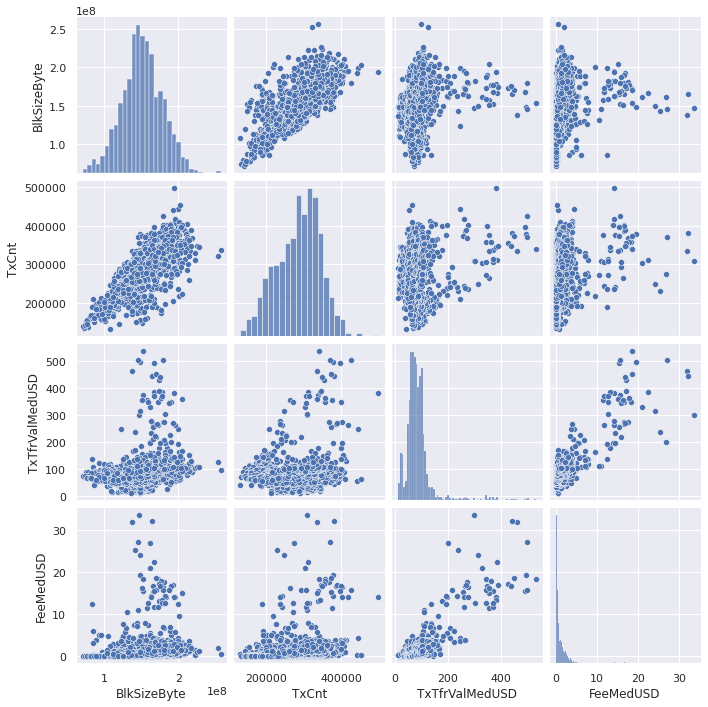

In [44]:
sns.set_theme(style="darkgrid")
sns.pairplot(btc_csv_2017, vars = ["BlkSizeByte", "TxCnt", "TxTfrValMedUSD", "FeeMedUSD"], dropna = True)
plt.show()

Taking a quick glance, we can see there is a relationship between Block Size Bytes & Transaction Counts, Transaction Value Median USD & Fee Median USD, and Transaction Counts & Fee Median USD.

Seaborn is used one more time here to generate a paired plot of 'PriceUSD' against 'CapMrktCurUSD' (Cap Market in current USD). Notice dropna = True is also included to eliminate rows with missing numbers.

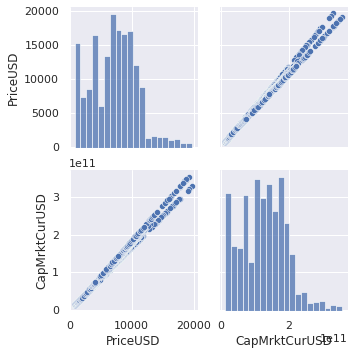

In [45]:
sns.pairplot(btc_csv_2017, vars = ["PriceUSD", "CapMrktCurUSD" ], dropna = True)
plt.show()